## Cargamos el dataset

In [2]:

#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargamos dataset a utilizar
df_entrada = pd.read_csv("../data/ds_gasto_4.csv", sep=";")

In [4]:
df_entrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627870 entries, 0 to 627869
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ANIO                              627870 non-null  int64  
 1   NIVEL                             627870 non-null  int64  
 2   NIVEL_GOBIERNO                    627870 non-null  object 
 3   DPTO                              627870 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE     627870 non-null  object 
 5   FUNCION                           627870 non-null  int64  
 6   FUNCION_NOMBRE                    627870 non-null  object 
 7   PIA                               627870 non-null  int64  
 8   PIM                               627870 non-null  int64  
 9   DEVENGADO                         627870 non-null  float64
 10  IP                                627870 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL          627870 non-null  i

In [5]:
df_1 = df_entrada.query('DEVENGADO >= 0')
df_entrada = df_1.query('PIM >= DEVENGADO')
df_entrada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627804 entries, 0 to 627869
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ANIO                              627804 non-null  int64  
 1   NIVEL                             627804 non-null  int64  
 2   NIVEL_GOBIERNO                    627804 non-null  object 
 3   DPTO                              627804 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE     627804 non-null  object 
 5   FUNCION                           627804 non-null  int64  
 6   FUNCION_NOMBRE                    627804 non-null  object 
 7   PIA                               627804 non-null  int64  
 8   PIM                               627804 non-null  int64  
 9   DEVENGADO                         627804 non-null  float64
 10  IP                                627804 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL          627804 non-null  int64 

## EXPLORACION

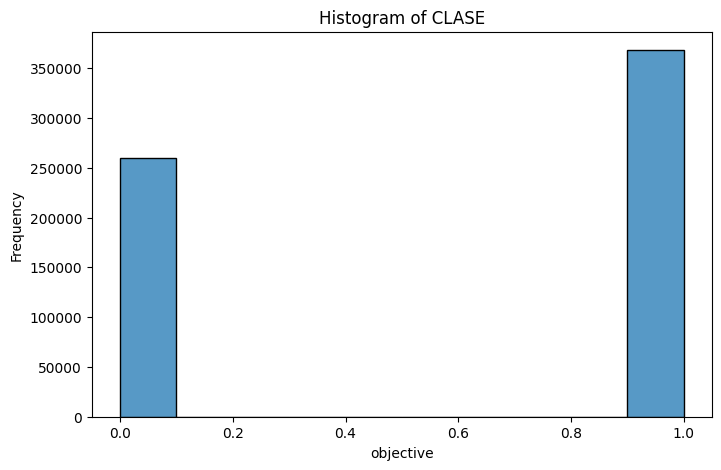

In [5]:
# Create a histogram for objective
plt.figure(figsize=(8, 5))
sns.histplot(df_entrada['CLASE'], bins=10, kde=False)
plt.xlabel('objective')
plt.ylabel('Frequency')
plt.title('Histogram of CLASE')
plt.show()

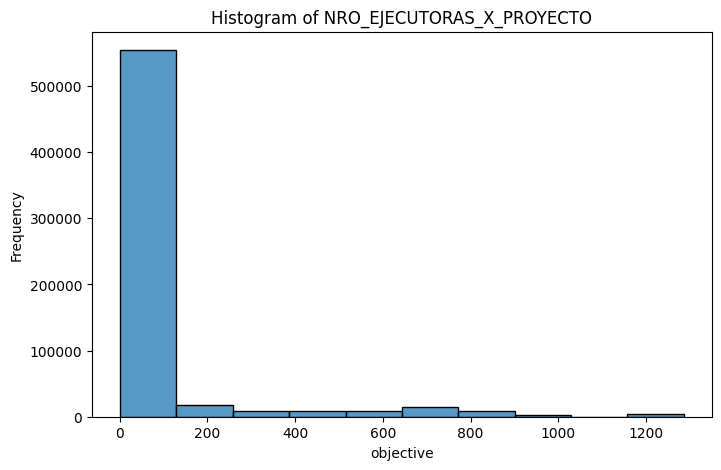

In [7]:
# Create a histogram for objective
plt.figure(figsize=(8, 5))
sns.histplot(df_entrada['NRO_EJECUTORAS_X_PROYECTO'], bins=10, kde=False)
plt.xlabel('objective')
plt.ylabel('Frequency')
plt.title('Histogram of NRO_EJECUTORAS_X_PROYECTO')
plt.show()

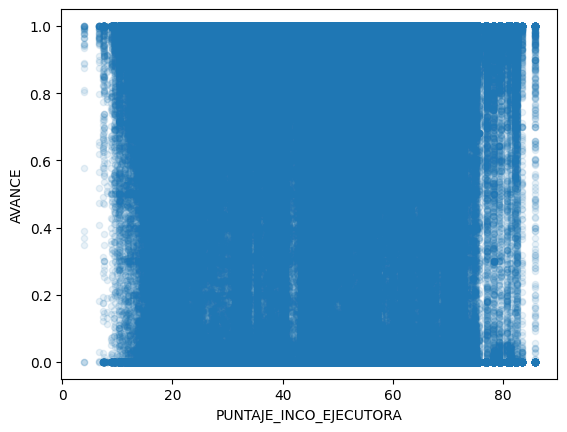

In [7]:
df_entrada_mayor_2021=df_entrada.query('ANIO > 2021')
df_entrada.plot.scatter(x="PUNTAJE_INCO_EJECUTORA", y="AVANCE", alpha=0.1)
plt.show()
#IGEIP_EJECUCION
#NEJE_PUNTAJEIRI
#NRO_EJECUTORAS_X_PROYECTO
#P_INCO_AVG


## DROP

In [8]:
col_to_drop = [ 'ANIO'
            ,'NIVEL_GOBIERNO'
            ,'DEPARTAMENTO_EJECUTORA_NOMBRE'
            ,'FUNCION_NOMBRE'
            ,'PIA'
            ,'DEVENGADO'
            ,'PROYECTO'
            ,'EJECUTORA'
            ,'AVANCE' 
            #,'CLASE'
            ,'FENOMENO_NINO' # IG muy bajo
            ,'CAMBIO_GOBIERNO_NACIONAL' # IG muy bajo
            ]
               
df_entrada_drop = df_entrada.drop(col_to_drop, axis='columns', inplace=False)

In [9]:
df_entrada_drop

,NIVEL,DPTO,FUNCION,PIM,IP,NRO_PRESIDENTES_X_ANO,PANDEMIA,CAMBIO_GOBIERNO_REGIONAL_LOCAL,ELECCION_REGIONAL_LOCAL,TIPO_GOBIERNO_NACIONAL,...,PROYECTO_EDAD_NETA,PROYECTO_EDAD_BRUTA,IGEIP_EJECUCION,P_INCO_AVG,NEJE_PUNTAJEIRI,NRO_EJECUTORAS_X_PROYECTO,NPRY_PUNTAJEIRI,PUNTAJE_INCO_EJECUTORA,NRO_PROYECTOS_X_EJECUTORA_X_ANIO,CLASE
0,2,1,15,79983,34.90,1,0,0,0,Centro derecha,...,6,8,0.629,51.47,36.305761,1,55.902316,51.47,205,1
1,2,1,15,57539,25.80,1,1,1,0,Izquierda,...,6,8,0.629,51.47,36.305761,1,55.902316,51.47,127,1
2,2,1,15,160000,39.70,2,0,0,0,Centro izquierda,...,6,8,0.629,51.47,36.305761,1,55.902316,51.47,263,1
3,2,1,15,41528,36.10,3,1,0,0,Centro derecha,...,6,8,0.629,51.47,36.305761,1,55.902316,51.47,147,1
4,2,1,15,914962,30.50,1,0,1,0,Centro derecha,...,6,8,0.629,51.47,36.305761,1,55.902316,51.47,169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627865,1,15,2,800000,14.20,1,0,1,0,Centro izquierda,...,6,10,0.635,43.52,41.130490,2,29.744302,61.50,5,1
627866,1,15,2,2529872,24.90,2,1,0,1,Izquierda,...,4,4,0.635,43.52,41.130490,1,35.162257,61.50,9,0
627867,1,15,2,2118508,14.35,1,0,1,0,Centro derecha,...,4,4,0.635,43.52,41.130490,1,35.162257,61.50,5,0
627868,1,15,2,2118508,26.55,3,1,0,0,Centro derecha,...,4,4,0.635,43.52,41.130490,1,35.162257,61.50,5,0


## ONE HOT

In [10]:
# Aplicar one-hot encoding a 'columna1'
columns_to_one_hot_encode = ['NIVEL', 'TIPO_GOBIERNO_NACIONAL', 'DPTO', 'FUNCION']
df_one_hot = pd.get_dummies(df_entrada_drop, columns=columns_to_one_hot_encode, dtype=int)

In [11]:
(
    df_one_hot.rename(columns={'TIPO_GOBIERNO_NACIONAL_Centro derecha': 'tgn_centro_derecha',
                                'TIPO_GOBIERNO_NACIONAL_Centro izquierda': 'tgn_centro_izquierda',
                                'TIPO_GOBIERNO_NACIONAL_Izquierda': 'tgn_izquierda',
                                        }, inplace=True)
)

In [12]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627804 entries, 0 to 627869
Data columns (total 74 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   PIM                               627804 non-null  int64  
 1   IP                                627804 non-null  float64
 2   NRO_PRESIDENTES_X_ANO             627804 non-null  int64  
 3   PANDEMIA                          627804 non-null  int64  
 4   CAMBIO_GOBIERNO_REGIONAL_LOCAL    627804 non-null  int64  
 5   ELECCION_REGIONAL_LOCAL           627804 non-null  int64  
 6   NRO_CONFLICTO_SOCIAL_X_ANO        627804 non-null  int64  
 7   INFLACION_ANUAL                   627804 non-null  float64
 8   PROYECTO_EDAD_NETA                627804 non-null  int64  
 9   PROYECTO_EDAD_BRUTA               627804 non-null  int64  
 10  IGEIP_EJECUCION                   627804 non-null  float64
 11  P_INCO_AVG                        627804 non-null  float6

## X e y

In [13]:
df_one_hot.PIM.max()

np.int64(1870600571)

In [14]:
X = df_one_hot.drop(['CLASE'], axis=1)
y = df_one_hot['CLASE'].values

## Split train and test

In [16]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=42)

## MODELING

In [17]:
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439462 entries, 233069 to 121969
Data columns (total 73 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   PIM                               439462 non-null  int64  
 1   IP                                439462 non-null  float64
 2   NRO_PRESIDENTES_X_ANO             439462 non-null  int64  
 3   PANDEMIA                          439462 non-null  int64  
 4   CAMBIO_GOBIERNO_REGIONAL_LOCAL    439462 non-null  int64  
 5   ELECCION_REGIONAL_LOCAL           439462 non-null  int64  
 6   NRO_CONFLICTO_SOCIAL_X_ANO        439462 non-null  int64  
 7   INFLACION_ANUAL                   439462 non-null  float64
 8   PROYECTO_EDAD_NETA                439462 non-null  int64  
 9   PROYECTO_EDAD_BRUTA               439462 non-null  int64  
 10  IGEIP_EJECUCION                   439462 non-null  float64
 11  P_INCO_AVG                        439462 non-null  f

### RANDOM FOREST

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from time import time
# 2. Función para entrenar y evaluar modelos
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    start_time = time()
    model.fit(X_train, y_train)
    train_time = time() - start_time
    
    start_time = time()
    y_pred = model.predict(X_test)
    predict_time = time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Prediction time: {predict_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [22]:
from sklearn.ensemble import RandomForestClassifier

# 4. Random Forest
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
train_and_evaluate(rf_model, X_train, X_test, y_train, y_test)


Training Random Forest model...
Accuracy: 0.7026
Training time: 27.09 seconds
Prediction time: 1.89 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.58      0.62     77944
           1       0.73      0.79      0.76    110398

    accuracy                           0.70    188342
   macro avg       0.69      0.68      0.69    188342
weighted avg       0.70      0.70      0.70    188342


Confusion Matrix:
[[45063 32881]
 [23127 87271]]


In [48]:

# 5. Optimización de hiperparámetros para Random Forest
print("\nOptimizing Random Forest hyperparameters...")
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

print("Best parameters:", rf_random.best_params_)
print("\nEvaluating optimized Random Forest model...")
train_and_evaluate(rf_random.best_estimator_, X_train, X_test, y_train, y_test)


Optimizing Random Forest hyperparameters...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30}

Evaluating optimized Random Forest model...
Accuracy: 0.6864
Training time: 224.36 seconds
Prediction time: 14.50 seconds

Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.51      0.58     78243
         1.0       0.70      0.81      0.75    110118

    accuracy                           0.69    188361
   macro avg       0.68      0.66      0.66    188361
weighted avg       0.68      0.69      0.68    188361


Confusion Matrix:
[[40227 38016]
 [21049 89069]]


# StandardScaler

## RobustScaler

In [18]:
from sklearn.preprocessing import RobustScaler

In [19]:
# Crear el objeto RobustScaler
scaler = RobustScaler()

# Ajustar el scaler a los datos de entrenamiento y transformar
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)

In [2]:
# Convertir los resultados a DataFrames si es necesario
X_train_rs = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_rs = pd.DataFrame(X_test_scaled, columns=X_test.columns)

NameError: name 'pd' is not defined

### LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train_rs, y_train)

c:\DATA\scm\github\mia\MIA104\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn.metrics import accuracy_score
prediction_test = model.predict(X_test_rs)
print(accuracy_score(y_test, prediction_test))

0.6082318772864114


### RandomForest

In [23]:
from sklearn.ensemble import RandomForestClassifier

# 4. Random Forest
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
train_and_evaluate(rf_model, X_train_scaled, X_test_scaled, y_train, y_test)


Training Random Forest model...
Accuracy: 0.7025
Training time: 33.48 seconds
Prediction time: 1.78 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.58      0.62     77944
           1       0.73      0.79      0.76    110398

    accuracy                           0.70    188342
   macro avg       0.69      0.68      0.69    188342
weighted avg       0.70      0.70      0.70    188342


Confusion Matrix:
[[45056 32888]
 [23136 87262]]


In [33]:
X_train_rs.head()

,PIM,IP,NRO_PRESIDENTES_X_ANO,PANDEMIA,CAMBIO_GOBIERNO_REGIONAL_LOCAL,ELECCION_REGIONAL_LOCAL,NRO_CONFLICTO_SOCIAL_X_ANO,INFLACION_ANUAL,PROYECTO_EDAD_NETA,PROYECTO_EDAD_BRUTA,...,FUNCION_16,FUNCION_17,FUNCION_18,FUNCION_19,FUNCION_20,FUNCION_21,FUNCION_22,FUNCION_23,FUNCION_24,FUNCION_25
0,0.202616,-0.429379,0.0,0.0,1.0,0.0,0.333333,0.346041,0.50,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.180939,-0.661017,1.0,0.0,0.0,1.0,-0.380952,-0.302053,0.75,1.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.243818,1.564972,0.0,0.0,0.0,0.0,-0.642857,-0.105572,2.25,1.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.119368,1.259887,0.0,0.0,0.0,0.0,-0.666667,-0.545455,1.00,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.110360,0.000000,0.0,0.0,0.0,0.0,-0.785714,-0.167155,-0.50,-0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Optimización

In [24]:
# 5. Optimización de hiperparámetros para Random Forest
print("\nOptimizing Random Forest hyperparameters...")
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train_scaled, y_train)

print("Best parameters:", rf_random.best_params_)
print("\nEvaluating optimized Random Forest model...")
train_and_evaluate(rf_random.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test)


Optimizing Random Forest hyperparameters...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\ws\scm\github\mia\MIA104\.venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}

Evaluating optimized Random Forest model...
Accuracy: 0.7086
Training time: 280.28 seconds
Prediction time: 16.81 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.54      0.61     77944
           1       0.72      0.82      0.77    110398

    accuracy                           0.71    188342
   macro avg       0.70      0.68      0.69    188342
weighted avg       0.71      0.71      0.70    188342


Confusion Matrix:
[[42381 35563]
 [19322 91076]]


### delete redundance column

In [27]:
X_2 = df_one_hot.drop(['CLASE'], axis=1)
y_2 = df_one_hot['CLASE'].values

In [28]:
X_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627804 entries, 0 to 627869
Data columns (total 73 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   PIM                               627804 non-null  int64  
 1   IP                                627804 non-null  float64
 2   NRO_PRESIDENTES_X_ANO             627804 non-null  int64  
 3   PANDEMIA                          627804 non-null  int64  
 4   CAMBIO_GOBIERNO_REGIONAL_LOCAL    627804 non-null  int64  
 5   ELECCION_REGIONAL_LOCAL           627804 non-null  int64  
 6   NRO_CONFLICTO_SOCIAL_X_ANO        627804 non-null  int64  
 7   INFLACION_ANUAL                   627804 non-null  float64
 8   PROYECTO_EDAD_NETA                627804 non-null  int64  
 9   PROYECTO_EDAD_BRUTA               627804 non-null  int64  
 10  IGEIP_EJECUCION                   627804 non-null  float64
 11  P_INCO_AVG                        627804 non-null  float6

In [29]:
col_to_drop = [ 'P_INCO_AVG'
            ,'NEJE_PUNTAJEIRI'
            ]

In [31]:
X_2.drop(col_to_drop, axis='columns', inplace=True)

In [32]:
(X_train_2, X_test_2, y_train, y_test) = train_test_split(X_2, y, test_size=0.3, random_state=42)

In [33]:
# Crear el objeto RobustScaler
scaler = RobustScaler()

# Ajustar el scaler a los datos de entrenamiento y transformar
X_train_2_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test_2_scaled = scaler.transform(X_test)

In [34]:
# 4. Random Forest
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
train_and_evaluate(rf_model, X_train_2_scaled, X_test_2_scaled, y_train, y_test)


Training Random Forest model...
Accuracy: 0.7025
Training time: 32.22 seconds
Prediction time: 1.87 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.58      0.62     77944
           1       0.73      0.79      0.76    110398

    accuracy                           0.70    188342
   macro avg       0.69      0.68      0.69    188342
weighted avg       0.70      0.70      0.70    188342


Confusion Matrix:
[[45056 32888]
 [23136 87262]]


In [35]:
feature_importances = rf_model.feature_importances_

importances_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})  

importances_df = importances_df.sort_values('importance', ascending=False)

In [36]:
importances_df.head(10)

,feature,importance
0,PIM,0.196738
14,NPRY_PUNTAJEIRI,0.139036
16,NRO_PROYECTOS_X_EJECUTORA_X_ANIO,0.091965
12,NEJE_PUNTAJEIRI,0.086904
15,PUNTAJE_INCO_EJECUTORA,0.083675
9,PROYECTO_EDAD_BRUTA,0.052902
8,PROYECTO_EDAD_NETA,0.047379
1,IP,0.027003
13,NRO_EJECUTORAS_X_PROYECTO,0.025834
10,IGEIP_EJECUCION,0.020418
